# Kate Cough

July 7, 2017

## Supreme Court Project Guide

The ultimate goal of this project is to build a database of Supreme Court cases for 2016 that includes the dialogue from the oral arguments of each case. As we have seen in class the arguments were scraped from this page: https://www.supremecourt.gov/oral_arguments/argument_transcript.aspx 

I have already downloaded and transformed the PDFs of the transcripts into text documents which you can download from courseworks: supreme_court_pdfs_txt.zip

There are three steps that you need to complete:

**Please note:** Step 3 is the most challenging--if you want to spend some time coding, you can skip Steps 1 and 2 and get to work on Step 3

**STEP 1:** scrape all of the case information available on this page: https://www.supremecourt.gov/oral_arguments/argument_transcript.aspx 

This should include case name, docket number, etc--and most importantly the name of the PDF file. All of the text files share the exact same name as the PDF files they came from. This file name will allow you to connect your transcription data with your case data. 

It is up to you what kind Data structure you want to build. But it likely to be a list of lists, or list of dictionaries--for each case you will have a list or dictionary of the information you scrape from the webpage.

**STEP 2:** find a secondary source to scrape/integrate with your case data. The information on the Supreme Court page is very limited. You need to find a source or group of sources that ad information. The most important information would likely be: the decision, who voted for and against, and the state of origin of the case (for geocoding). You might think of other great things to put in there too! This information needs to be merged with the data you have from STEP 2.

**STEP 3:** use regular expressions to clean up and parse the text files so that you have a searchable data structure containing the dialog from the transcripts. 

From a data architecture perspective, you probably want to have a separate list for each case and in each list a data structure that pairs the speaker with what she/he says. Like:

`[['MR. BERGERON'," Yes. That's essentially the same thing"],[ 'JUSTICE SOTOMAYOR',' So how do you deal with Chambers?']]`

This is a list of lists --it could also be a list of dictionaries if you want it to be. The real programmatic challenge here is to clean up the text files and parse them successfully. Most of the instructions below are devoted to this, but Steps 1 and 2 are also extremely important.

Go step-by-step through this, and email me whenever you get stuck, and I will help. If you complete all the steps before Tuesday, email me if you want to go further.



### STEP 1
Scrape all of the necessary information from:

https://www.supremecourt.gov/oral_arguments/argument_transcript.aspx 

You should result and a list of dictionaries for each case.

# First, import all of the things you will need.

In [1]:
###Import your libraries and all other things

from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import pandas as pd
import re
import numpy as np
import geopandas as gpd

from shapely.geometry import Point

from collections import Counter

%matplotlib inline

# Next, scrape the website: 

https://www.supremecourt.gov/oral_arguments/argument_transcript.aspx

We're looking for:
The case name
The docket number
The date
The link (because it contains the docket number, which we will later match with the pdf files that were given to us)


In [2]:
###Write your scraping code here
url = 'https://www.supremecourt.gov/oral_arguments/argument_transcript.aspx'
raw_html = urlopen(url).read()
doc = BeautifulSoup(raw_html, 'html.parser')

result = requests.get('https://www.supremecourt.gov/oral_arguments/argument_transcript.aspx')
#store the result of in the variable 'result'
# result.text

### After this we have to make a list with a dictionary inside it that contains the keys:

link

name

date

docket_number

In [3]:
### Print out your list of lists or dictionaries here
#define the variable doc
#the info is in the table (defined by the class table datatables) and in the table rows.
#define the variable for the table rows
#make a list to store the info

table = doc.find('table', class_ = 'table datatables')
cases = table.find_all('tr')

supreme_court_list_all = []

for each_case in cases:
    
    current = {}
    #make a dictionary. for each entry in the dictionary 
    #there will be four key : value pairs: link, name, date and docket_number, defined below
    #using beautiful soup and the tags, we'll find each one. remember we're already inside the tr tag
    
    link = each_case.find_all('td')[0].find('a')
    
    name = each_case.find('span')
    
    date = each_case.find_all('td')[1].string
    
    docket_number = each_case.find_all('td')[0].find(target = '_blank')
    
    if link:
        current['Text'] = link['href'].split('/')[-1]
    if name:
        current['Case Name'] = name.string
    if date:    
        current['Date Argued'] = date
    if docket_number:
        current['Docket Number'] = docket_number.string.strip()
    
    supreme_court_list_all.append(current)
    
supreme_court_list_all



[{'Date Argued': 'Date Argued'},
 {'Case Name': 'Perry v. Merit Systems Protection Bd.',
  'Date Argued': '04/17/17',
  'Docket Number': '16-399.',
  'Text': '16-399_3f14.pdf'},
 {'Case Name': 'Town of Chester v. Laroe Estates, Inc.',
  'Date Argued': '04/17/17',
  'Docket Number': '16-605.',
  'Text': '16-605_2dp3.pdf'},
 {'Case Name': "California Public Employees' Retirement System v. ANZ Securities, Inc.",
  'Date Argued': '04/17/17',
  'Docket Number': '16-373.',
  'Text': '16-373_4e46.pdf'},
 {'Case Name': 'Kokesh v. SEC',
  'Date Argued': '04/18/17',
  'Docket Number': '16-529.',
  'Text': '16-529_21p3.pdf'},
 {'Case Name': 'Henson v. Santander Consumer USA Inc.',
  'Date Argued': '04/18/17',
  'Docket Number': '16-349.',
  'Text': '16-349_e29g.pdf'},
 {'Case Name': 'Trinity Lutheran Church of Columbia, Inc. v. Comer',
  'Date Argued': '04/19/17',
  'Docket Number': '15-577.',
  'Text': '15-577_l64n.pdf'},
 {'Case Name': 'Weaver v. Massachusetts',
  'Date Argued': '04/19/17',
  '

## Make this into a dataframe, see what it looks like

In [4]:
scraped_supreme_court = pd.DataFrame(supreme_court_list_all)
scraped_supreme_court.head()

,Case Name,Date Argued,Docket Number,Text
0,NaN,Date Argued,NaN,NaN
1,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14.pdf
2,"Town of Chester v. Laroe Estates, Inc.",04/17/17,16-605.,16-605_2dp3.pdf
3,California Public Employees' Retirement System...,04/17/17,16-373.,16-373_4e46.pdf
4,Kokesh v. SEC,04/18/17,16-529.,16-529_21p3.pdf


In [5]:
scraped_supreme_court.shape

(71, 4)

In [6]:
# df.to_csv("supreme_court_list_all.csv", index=False)
# supreme_court_list_all = pd.read_csv('supreme_court_list_all.csv')
# supreme_court_list_all.head()


In [7]:
#get rid of the na values
scraped_supreme_court.dropna(inplace=True)

In [8]:
#what is this doing?
array = scraped_supreme_court['Text'].unique()
array.sort()
array

array(['14-1055_h3dj.pdf', '14-1538_j4ek.pdf', '14-9496_feah.pdf',
       '15-1031_6647.pdf', '15-1039_bqm1.pdf', '15-1111_ca7d.pdf',
       '15-1189_6468.pdf', '15-118_3e04.pdf', '15-1191_igdj.pdf',
       '15-1194_0861.pdf', '15-1204_k536.pdf', '15-1248_2dq3.pdf',
       '15-1251_q86b.pdf', '15-1256_d1o2.pdf', '15-1262_l537.pdf',
       '15-1293_o7jp.pdf', '15-1358_7648.pdf', '15-1391_5315.pdf',
       '15-1406_d1of.pdf', '15-1498_m647.pdf', '15-1500_5g68.pdf',
       '15-1503_3f14.pdf', '15-214_l6hn.pdf', '15-423_pnk0.pdf',
       '15-457_gfbh.pdf', '15-497_4g15.pdf', '15-513_k5fm.pdf',
       '15-537_ljgm.pdf', '15-577_l64n.pdf', '15-5991_21p3.pdf',
       '15-606_5iel.pdf', '15-628_p86a.pdf', '15-649_l5gm.pdf',
       '15-680_n648.pdf', '15-7250_3eah.pdf', '15-777_1b82.pdf',
       '15-797_f2q3.pdf', '15-8049_4f15.pdf', '15-827_gfbh.pdf',
       '15-8544_c1o2.pdf', '15-866_j426.pdf', '15-9260_bq7c.pdf',
       '15-927_6j37.pdf', '16-142_4gc5.pdf', '16-149_bodg.pdf',
       '16-240

# Switching gears: 
### Let's now open up one of the text files and start cleaning it using regular expressions. Any file will do.

In [9]:
#Open a sample text file from your computer-
#one of the pdfs that were given to us, and
#take a look at it
f = open('/Users/kaitlincough/Documents/Lede/thirkield/final_project_supreme_court/pdfs/15-777_1b82.txt', 'r')
sample_transcript = f.read()

In [10]:
#here's code just to look at this if you want to

# !cat /Users/kaitlincough/Documents/Lede/thirkield/python_notebooks_thirkield/pdfs/15-777_1b82.txt

In [11]:
#Take a look at the text file
sample_transcript

'Official - Subject to Final Review\n1 1 IN THE SUPREME COURT OF THE UNITED STATES\n\n2 -----------------x\n\n3 SAMSUNG ELECTRONICS CO.,\n\n:\n\n4 LTD., ET AL.,\n\n:\n\n5\n\nPetitioners\n\n: No. 15-777\n\n6 v.\n\n:\n\n7 APPLE, INC.,\n\n:\n\n8\n\nRespondent.\n\n:\n\n9 -----------------x\n\n10 Washington, D.C.\n\n11 Tuesday, October 11, 2016\n\n12\n\n13 The above-entitled matter came on for oral\n\n14 argument before the Supreme Court of the United States\n\n15 at 10:05 a.m.\n\n16 APPEARANCES:\n\n17 KATHLEEN M. SULLIVAN, ESQ., New York, N.Y.; on behalf of\n\n18 the Petitioners.\n\n19 BRIAN H. FLETCHER, ESQ., Assistant to the Solicitor\n\n20 General, Department of Justice, Washington, D.C.;\n\n21 for United States, as amicus curiae, supporting\n\n22 neither party.\n\n23 SETH P. WAXMAN, ESQ., Washington, D.C.; on behalf of the\n\n24 Respondent.\n\n25\n\nAlderson Reporting Company\n\n\x0cOfficial - Subject to Final Review\n1 CONTENTS 2 ORAL ARGUMENT OF 3 KATHLEEN M. SULLIVAN, ESQ. 4 On beha

In [12]:
#getting rid of the beginning
remove_beginning = re.split(r'\bPROCEEDINGS \d \(\d\d\:\d\d \w\.m\.\)', sample_transcript)
remove_beginning[1]

' 3 CHIEF JUSTICE ROBERTS: We\'ll hear argument 4 first this morning in Case No. 15-777, Samsung 5 Electronics v. Apple, Incorporated. 6 Ms. Sullivan. 7 ORAL ARGUMENT OF KATHLEEN M. SULLIVAN 8 ON BEHALF OF THE PETITIONERS 9 MS. SULLIVAN: Mr. Chief Justice, and may it 10 please the Court: 11 A smartphone is smart because it contains 12 hundreds of thousands of the technologies that make it 13 work. But the Federal Circuit held that Section 289 of 14 the Patent Act entitles the holder of a single design 15 patent on a portion of the appearance of the phone to 16 total profit on the entire phone. 17 That result makes no sense. A single design 18 patent on the portion of the appearance of a phone 19 should not entitle the design-patent holder to all the 20 profit on the entire phone. 21 Section 289 does not require that result, 22 and as this case comes to the Court on the briefing, 23 Apple and the government now agree that Section 289 does 24 not require that result. We respectfully ask 

In [13]:
#getting rid of the Alderson Reporting Company
remove_alderson = re.sub('Alderson Reporting Company|Official - Subject to Final Review', '', remove_beginning[1])
remove_alderson

' 3 CHIEF JUSTICE ROBERTS: We\'ll hear argument 4 first this morning in Case No. 15-777, Samsung 5 Electronics v. Apple, Incorporated. 6 Ms. Sullivan. 7 ORAL ARGUMENT OF KATHLEEN M. SULLIVAN 8 ON BEHALF OF THE PETITIONERS 9 MS. SULLIVAN: Mr. Chief Justice, and may it 10 please the Court: 11 A smartphone is smart because it contains 12 hundreds of thousands of the technologies that make it 13 work. But the Federal Circuit held that Section 289 of 14 the Patent Act entitles the holder of a single design 15 patent on a portion of the appearance of the phone to 16 total profit on the entire phone. 17 That result makes no sense. A single design 18 patent on the portion of the appearance of a phone 19 should not entitle the design-patent holder to all the 20 profit on the entire phone. 21 Section 289 does not require that result, 22 and as this case comes to the Court on the briefing, 23 Apple and the government now agree that Section 289 does 24 not require that result. We respectfully ask 

In [14]:
remove_end = re.split(r'Whereupon', remove_alderson)
remove_end[0]

' 3 CHIEF JUSTICE ROBERTS: We\'ll hear argument 4 first this morning in Case No. 15-777, Samsung 5 Electronics v. Apple, Incorporated. 6 Ms. Sullivan. 7 ORAL ARGUMENT OF KATHLEEN M. SULLIVAN 8 ON BEHALF OF THE PETITIONERS 9 MS. SULLIVAN: Mr. Chief Justice, and may it 10 please the Court: 11 A smartphone is smart because it contains 12 hundreds of thousands of the technologies that make it 13 work. But the Federal Circuit held that Section 289 of 14 the Patent Act entitles the holder of a single design 15 patent on a portion of the appearance of the phone to 16 total profit on the entire phone. 17 That result makes no sense. A single design 18 patent on the portion of the appearance of a phone 19 should not entitle the design-patent holder to all the 20 profit on the entire phone. 21 Section 289 does not require that result, 22 and as this case comes to the Court on the briefing, 23 Apple and the government now agree that Section 289 does 24 not require that result. We respectfully ask 

In [15]:
#remove the number on the left hand side of the page
remove_numbers = re.sub(r'[\n ][12]?\d |\n\n\n|', '', remove_end[0])
remove_numbers

'CHIEF JUSTICE ROBERTS: We\'ll hear argumentfirst this morning in Case No. 15-777, SamsungElectronics v. Apple, Incorporated.Ms. Sullivan.ORAL ARGUMENT OF KATHLEEN M. SULLIVANON BEHALF OF THE PETITIONERSMS. SULLIVAN: Mr. Chief Justice, and may itplease the Court:A smartphone is smart because it containshundreds of thousands of the technologies that make itwork. But the Federal Circuit held that Section 289 ofthe Patent Act entitles the holder of a single designpatent on a portion of the appearance of the phone tototal profit on the entire phone.That result makes no sense. A single designpatent on the portion of the appearance of a phoneshould not entitle the design-patent holder to all theprofit on the entire phone.Section 289 does not require that result,and as this case comes to the Court on the briefing,Apple and the government now agree that Section 289 doesnot require that result. We respectfully ask that theCourt hold that when a design patent claims a design\x0c1 that is applied

In [16]:
#remove more numbers
remove_nums = re.sub(r" \d ", "", remove_numbers)
remove_nums

'CHIEF JUSTICE ROBERTS: We\'ll hear argumentfirst this morning in Case No. 15-777, SamsungElectronics v. Apple, Incorporated.Ms. Sullivan.ORAL ARGUMENT OF KATHLEEN M. SULLIVANON BEHALF OF THE PETITIONERSMS. SULLIVAN: Mr. Chief Justice, and may itplease the Court:A smartphone is smart because it containshundreds of thousands of the technologies that make itwork. But the Federal Circuit held that Section 289 ofthe Patent Act entitles the holder of a single designpatent on a portion of the appearance of the phone tototal profit on the entire phone.That result makes no sense. A single designpatent on the portion of the appearance of a phoneshould not entitle the design-patent holder to all theprofit on the entire phone.Section 289 does not require that result,and as this case comes to the Court on the briefing,Apple and the government now agree that Section 289 doesnot require that result. We respectfully ask that theCourt hold that when a design patent claims a design\x0c1 that is applied

In [17]:
#remove the katherine sullivan line
remove_argument = re.sub(r"\w+ ARGUMENT [^a-z]+ (PETITIONER|RESPONDENT)S?", "", remove_nums)
remove_argument

'CHIEF JUSTICE ROBERTS: We\'ll hear argumentfirst this morning in Case No. 15-777, SamsungElectronics v. Apple, Incorporated.Ms. Sullivan.MS. SULLIVAN: Mr. Chief Justice, and may itplease the Court:A smartphone is smart because it containshundreds of thousands of the technologies that make itwork. But the Federal Circuit held that Section 289 ofthe Patent Act entitles the holder of a single designpatent on a portion of the appearance of the phone tototal profit on the entire phone.That result makes no sense. A single designpatent on the portion of the appearance of a phoneshould not entitle the design-patent holder to all theprofit on the entire phone.Section 289 does not require that result,and as this case comes to the Court on the briefing,Apple and the government now agree that Section 289 doesnot require that result. We respectfully ask that theCourt hold that when a design patent claims a design\x0c1 that is applied to a component of a phone or a componentof a product, or, to use

In [18]:
#get rid of the x0c
remove_x0 = re.sub(r'[\x0c]*', '', remove_argument)
remove_x0

'CHIEF JUSTICE ROBERTS: We\'ll hear argumentfirst this morning in Case No. 15-777, SamsungElectronics v. Apple, Incorporated.Ms. Sullivan.MS. SULLIVAN: Mr. Chief Justice, and may itplease the Court:A smartphone is smart because it containshundreds of thousands of the technologies that make itwork. But the Federal Circuit held that Section 289 ofthe Patent Act entitles the holder of a single designpatent on a portion of the appearance of the phone tototal profit on the entire phone.That result makes no sense. A single designpatent on the portion of the appearance of a phoneshould not entitle the design-patent holder to all theprofit on the entire phone.Section 289 does not require that result,and as this case comes to the Court on the briefing,Apple and the government now agree that Section 289 doesnot require that result. We respectfully ask that theCourt hold that when a design patent claims a design1 that is applied to a component of a phone or a componentof a product, or, to use the

In [19]:
#and the ns
remove_n = re.sub(r'\n', '', remove_x0)
remove_n

'CHIEF JUSTICE ROBERTS: We\'ll hear argumentfirst this morning in Case No. 15-777, SamsungElectronics v. Apple, Incorporated.Ms. Sullivan.MS. SULLIVAN: Mr. Chief Justice, and may itplease the Court:A smartphone is smart because it containshundreds of thousands of the technologies that make itwork. But the Federal Circuit held that Section 289 ofthe Patent Act entitles the holder of a single designpatent on a portion of the appearance of the phone tototal profit on the entire phone.That result makes no sense. A single designpatent on the portion of the appearance of a phoneshould not entitle the design-patent holder to all theprofit on the entire phone.Section 289 does not require that result,and as this case comes to the Court on the briefing,Apple and the government now agree that Section 289 doesnot require that result. We respectfully ask that theCourt hold that when a design patent claims a design1 that is applied to a component of a phone or a componentof a product, or, to use the

In [20]:
#remove the timestamp before roberts
remove_time = re.split(r"([A-Z.\s]+:)", remove_n)
remove_time[1:]

['CHIEF JUSTICE ROBERTS:',
 " We'll hear argumentfirst this morning in Case No. 15-777, SamsungElectronics v. Apple, Incorporated.Ms. Sullivan",
 '.MS. SULLIVAN:',
 ' Mr. Chief Justice, and may itplease the Court:A smartphone is smart because it containshundreds of thousands of the technologies that make itwork. But the Federal Circuit held that Section 289 ofthe Patent Act entitles the holder of a single designpatent on a portion of the appearance of the phone tototal profit on the entire phone.That result makes no sense. A single designpatent on the portion of the appearance of a phoneshould not entitle the design-patent holder to all theprofit on the entire phone.Section 289 does not require that result,and as this case comes to the Court on the briefing,Apple and the government now agree that Section 289 doesnot require that result. We respectfully ask that theCourt hold that when a design patent claims a design1 that is applied to a component of a phone or a componentof a product,

In [21]:
remove_time = re.split(r"([A-Z.\s]+:)", remove_argument)
remove_time[1:]

['CHIEF JUSTICE ROBERTS:',
 " We'll hear argumentfirst this morning in Case No. 15-777, SamsungElectronics v. Apple, Incorporated.Ms. Sullivan",
 '.MS. SULLIVAN:',
 ' Mr. Chief Justice, and may itplease the Court:A smartphone is smart because it containshundreds of thousands of the technologies that make itwork. But the Federal Circuit held that Section 289 ofthe Patent Act entitles the holder of a single designpatent on a portion of the appearance of the phone tototal profit on the entire phone.That result makes no sense. A single designpatent on the portion of the appearance of a phoneshould not entitle the design-patent holder to all theprofit on the entire phone.Section 289 does not require that result,and as this case comes to the Court on the briefing,Apple and the government now agree that Section 289 doesnot require that result. We respectfully ask that theCourt hold that when a design patent claims a design\x0c1 that is applied to a component of a phone or a componentof a prod

## Get your dialogue list
Now this transcription should be clean enough to get a list with every speaker, and what the speaker said. 


In [22]:
#get a list of speaker and speech

speech1 = remove_time[1:]
speech1

['CHIEF JUSTICE ROBERTS:',
 " We'll hear argumentfirst this morning in Case No. 15-777, SamsungElectronics v. Apple, Incorporated.Ms. Sullivan",
 '.MS. SULLIVAN:',
 ' Mr. Chief Justice, and may itplease the Court:A smartphone is smart because it containshundreds of thousands of the technologies that make itwork. But the Federal Circuit held that Section 289 ofthe Patent Act entitles the holder of a single designpatent on a portion of the appearance of the phone tototal profit on the entire phone.That result makes no sense. A single designpatent on the portion of the appearance of a phoneshould not entitle the design-patent holder to all theprofit on the entire phone.Section 289 does not require that result,and as this case comes to the Court on the briefing,Apple and the government now agree that Section 289 doesnot require that result. We respectfully ask that theCourt hold that when a design patent claims a design\x0c1 that is applied to a component of a phone or a componentof a prod

## Make it a list of pairs


In [23]:
#make it a list of pairs of speaker and speech

speech2 = list(zip(speech1[0::2], speech1[1::2]))
speech2

[('CHIEF JUSTICE ROBERTS:',
  " We'll hear argumentfirst this morning in Case No. 15-777, SamsungElectronics v. Apple, Incorporated.Ms. Sullivan"),
 ('.MS. SULLIVAN:',
  ' Mr. Chief Justice, and may itplease the Court:A smartphone is smart because it containshundreds of thousands of the technologies that make itwork. But the Federal Circuit held that Section 289 ofthe Patent Act entitles the holder of a single designpatent on a portion of the appearance of the phone tototal profit on the entire phone.That result makes no sense. A single designpatent on the portion of the appearance of a phoneshould not entitle the design-patent holder to all theprofit on the entire phone.Section 289 does not require that result,and as this case comes to the Court on the briefing,Apple and the government now agree that Section 289 doesnot require that result. We respectfully ask that theCourt hold that when a design patent claims a design\x0c1 that is applied to a component of a phone or a componentof a

In [24]:
remove_beginning = re.split(r'\bPROCEEDINGS \d \(\d\d\:\d\d \w\.m\.\)', sample_transcript)
remove_alderson = re.sub('Alderson Reporting Company|Official - Subject to Final Review', '', remove_beginning[0])
remove_end = re.split(r'Whereupon', remove_alderson)
remove_numbers = re.sub(r'[\n ][12]?\d |\n\n\n|', '', remove_end[0])
remove_nums = re.sub(r" \d ", "", remove_numbers)
remove_argument = re.sub(r"\w+ ARGUMENT [^a-z]+ (PETITIONER|RESPONDENT)S?", "", remove_nums)
remove_x0 = re.sub(r'[\x0c]*', '', remove_argument)
remove_n = re.sub(r'[\n]', '', remove_x0)
remove_time = re.split(r"([A-Z.\s]+:)", remove_n)
remove_time[1:]
speech1[2] = re.sub(r"\.\s[A-Z.\s]{67}", "", speech1[2])
speech1[-24] = re.sub(r"\.\s[A-Z.\s]{71}", "", speech1[-24])
speech2 = list(zip(speech1[0::2], speech1[1::2]))


In [25]:
speech2

[('CHIEF JUSTICE ROBERTS:',
  " We'll hear argumentfirst this morning in Case No. 15-777, SamsungElectronics v. Apple, Incorporated.Ms. Sullivan"),
 ('.MS. SULLIVAN:',
  ' Mr. Chief Justice, and may itplease the Court:A smartphone is smart because it containshundreds of thousands of the technologies that make itwork. But the Federal Circuit held that Section 289 ofthe Patent Act entitles the holder of a single designpatent on a portion of the appearance of the phone tototal profit on the entire phone.That result makes no sense. A single designpatent on the portion of the appearance of a phoneshould not entitle the design-patent holder to all theprofit on the entire phone.Section 289 does not require that result,and as this case comes to the Court on the briefing,Apple and the government now agree that Section 289 doesnot require that result. We respectfully ask that theCourt hold that when a design patent claims a design\x0c1 that is applied to a component of a phone or a componentof a

In [26]:
def court_text(lines):
    remove_beginning = re.split(r'\bPROCEEDINGS \d \(\d\d\:\d\d \w\.m\.\)', lines)
    remove_alderson = re.sub('Alderson Reporting Company|Official - Subject to Final Review', '', remove_beginning[0])
    remove_end = re.split(r'Whereupon', remove_alderson)
    remove_numbers = re.sub(r'[\n ][12]?\d |\n\n\n|', '', remove_end[0])
    remove_nums = re.sub(r" \d ", "", remove_numbers)
    remove_argument = re.sub(r"\w+ ARGUMENT [^a-z]+ (PETITIONER|RESPONDENT)S?", "", remove_nums)
    remove_x0 = re.sub(r'[\x0c]*', '', remove_argument)
    remove_n = re.sub(r'[\n]', '', remove_x0)
    remove_time = re.split(r"([A-Z.\s]+:)", remove_n)
    remove_time[1:]
    speech1[2] = re.sub(r"\.\s[A-Z.\s]{67}", "", speech1[2])
    speech1[-24] = re.sub(r"\.\s[A-Z.\s]{71}", "", speech1[-24])
    speech2 = list(zip(speech1[0::2], speech1[1::2]))
    
    return speech2 

In [27]:
court_text(sample_transcript)
#run the function on sample_transcript

[('CHIEF JUSTICE ROBERTS:',
  " We'll hear argumentfirst this morning in Case No. 15-777, SamsungElectronics v. Apple, Incorporated.Ms. Sullivan"),
 ('.MS. SULLIVAN:',
  ' Mr. Chief Justice, and may itplease the Court:A smartphone is smart because it containshundreds of thousands of the technologies that make itwork. But the Federal Circuit held that Section 289 ofthe Patent Act entitles the holder of a single designpatent on a portion of the appearance of the phone tototal profit on the entire phone.That result makes no sense. A single designpatent on the portion of the appearance of a phoneshould not entitle the design-patent holder to all theprofit on the entire phone.Section 289 does not require that result,and as this case comes to the Court on the briefing,Apple and the government now agree that Section 289 doesnot require that result. We respectfully ask that theCourt hold that when a design patent claims a design\x0c1 that is applied to a component of a phone or a componentof a

# Loop through all texts



In [28]:
# all_cases = ['14-1538_j4ek', '14-9496_feah']
supreme_court_list_all = []
#create an empty list
path = '/Users/kaitlincough/Documents/Lede/thirkield/final_project_supreme_court/pdfs'
for file_name in array:
    print(file_name)
    # bad files
    if file_name != '15-1358_7648' and file_name != '15-577_l64n' and file_name !='14-1055_h3dj' and file_name != '15-866_j426' and file_name != '16-32_mlho' and file_name!= '16-466_4g15' and file_name !='16-529_21p3':
#         f = open(path + file_name + 'txt' + 'r')
        sample_transcript = f.read()
        this_list = court_text(sample_transcript)   
#         remember court_text was our function, and it's being applied to sample_transcript
        better_list = []
        #create another empty list 
        for each in this_list:
            entry = list(each)
            entry.append(file_name)
            better_list.append(entry)
        this_list.append(file_name)
        supreme_court_list_all.extend(better_list)

14-1055_h3dj.pdf
14-1538_j4ek.pdf
14-9496_feah.pdf
15-1031_6647.pdf
15-1039_bqm1.pdf
15-1111_ca7d.pdf
15-1189_6468.pdf
15-118_3e04.pdf
15-1191_igdj.pdf
15-1194_0861.pdf
15-1204_k536.pdf
15-1248_2dq3.pdf
15-1251_q86b.pdf
15-1256_d1o2.pdf
15-1262_l537.pdf
15-1293_o7jp.pdf
15-1358_7648.pdf
15-1391_5315.pdf
15-1406_d1of.pdf
15-1498_m647.pdf
15-1500_5g68.pdf
15-1503_3f14.pdf
15-214_l6hn.pdf
15-423_pnk0.pdf
15-457_gfbh.pdf
15-497_4g15.pdf
15-513_k5fm.pdf
15-537_ljgm.pdf
15-577_l64n.pdf
15-5991_21p3.pdf
15-606_5iel.pdf
15-628_p86a.pdf
15-649_l5gm.pdf
15-680_n648.pdf
15-7250_3eah.pdf
15-777_1b82.pdf
15-797_f2q3.pdf
15-8049_4f15.pdf
15-827_gfbh.pdf
15-8544_c1o2.pdf
15-866_j426.pdf
15-9260_bq7c.pdf
15-927_6j37.pdf
16-142_4gc5.pdf
16-149_bodg.pdf
16-240_nkp1.pdf
16-254_7lio.pdf
16-309_b97c.pdf
16-327_d18e.pdf
16-32_mlho.pdf
16-341_8njq.pdf
16-348_2cp3.pdf
16-349_e29g.pdf
16-369_8nka.pdf
16-373_4e46.pdf
16-399_3f14.pdf
16-405_9olb.pdf
16-466_4g15.pdf
16-5294_g314.pdf
16-529_21p3.pdf
16-54_7l48.pdf

In [29]:
# supreme_court_list_all
# col_names = ['speaker', 'words', 'case_id']
# supreme_df = pd.DataFrame(supreme_court_list_all, columns=col_names)
# supreme_df.head()

## After this we can take the information from our scraped file and this loop through all the texts and merge them. There's also a third data frame with information gathered manually from elsewhere.

In [30]:
#let's look at the scraped file and remind ourselves what's in there. 
#remember that this is information we got scraped from the supreme court website
scraped_supreme_court.head()

,Case Name,Date Argued,Docket Number,Text
1,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14.pdf
2,"Town of Chester v. Laroe Estates, Inc.",04/17/17,16-605.,16-605_2dp3.pdf
3,California Public Employees' Retirement System...,04/17/17,16-373.,16-373_4e46.pdf
4,Kokesh v. SEC,04/18/17,16-529.,16-529_21p3.pdf
5,Henson v. Santander Consumer USA Inc.,04/18/17,16-349.,16-349_e29g.pdf


### Let's clean up the scraped_supreme_court dataframe.  

In [31]:
#delete Text column, clean up Docket Number so it'll match later
scraped_supreme_court['Docket Number'].replace(r'\.', '', regex=True, inplace=True)
del scraped_supreme_court['Text']
scraped_supreme_court.head()

,Case Name,Date Argued,Docket Number
1,Perry v. Merit Systems Protection Bd.,04/17/17,16-399
2,"Town of Chester v. Laroe Estates, Inc.",04/17/17,16-605
3,California Public Employees' Retirement System...,04/17/17,16-373
4,Kokesh v. SEC,04/18/17,16-529
5,Henson v. Santander Consumer USA Inc.,04/18/17,16-349


### Let's import the clean data frame that has the actual TEXT of each case (and their docket number and the speaker's name). We got this file by looping through the texts and then cleaning it up

In [32]:
#import the clean df with the information from looping through the texts. 
#we took the looped information and manually cleaned it up, saving it to a new csv: casa_data.csv
#this is the dataframe with all of the text and the speaker's name.

supreme_df_clean = pd.read_csv('/Users/kaitlincough/Documents/Lede/thirkield/cases_data.csv')
supreme_df_clean.head()

,speaker,words,case_id
0,CHIEF JUSTICE ROBERTS:,We will hear argument next in Case No. 14-1055...,14-1055_h3dj
1,MR. ROSENKRANZ:,"Thank you, Mr. Chief Justice, and may it pleas...",14-1055_h3dj
2,JUSTICE GINSBURG:,Does that include -4 you -- you said subject-m...,14-1055_h3dj
3,MR. ROSENKRANZ:,I -- I am not limiting it to subject-matter ju...,14-1055_h3dj
4,JUSTICE GINSBURG:,What did you do -- what does Justice Souter's...,14-1055_h3dj


Clean up the text even more-get rid of the _ pdf and all of that because otherwise you can't join this otherwise with the scraped data 

In [33]:
#get rid of the last four digits at the end of case id so you can join it with the cases df
supreme_df_clean['case_id'].replace(r'\_\w\w\w\w', '', regex=True, inplace=True)

## Merge the dataframes! Combine the one with the text of the pdfs with the one that has the info scraped from the website. Merge them on Docket Number and case_id

In [34]:
# cases_clean_supreme = cases_df.merge(supreme_df_clean, left_on='Docket Number', right_on='case_id', how='outer')

df_all_info = scraped_supreme_court.merge(supreme_df_clean, left_on='Docket Number', right_on='case_id', how='outer' )

In [35]:
df_all_info.head()

,Case Name,Date Argued,Docket Number,speaker,words,case_id
0,Perry v. Merit Systems Protection Bd.,04/17/17,16-399,CHIEF JUSTICE ROBERTS:,We'll hear argument first this morning in Case...,16-399
1,Perry v. Merit Systems Protection Bd.,04/17/17,16-399,MR. LANDAU:,"Thank you, Mr. Chief Justice, and may it pleas...",16-399
2,Perry v. Merit Systems Protection Bd.,04/17/17,16-399,JUSTICE SOTOMAYOR:,I'm sorry --,16-399
3,Perry v. Merit Systems Protection Bd.,04/17/17,16-399,JUSTICE KENNEDY:,"Just -- just as an introductory question, Mr....",16-399
4,Perry v. Merit Systems Protection Bd.,04/17/17,16-399,MR. LANDAU:,"I don't think they will be able to, Your Hono...",16-399


## Let's clean up the columns a little, rename them, delete the ones we don't need.

In [36]:
#clean up the columns a little, delete duplicates

df_all_info.rename(columns={'words': 'Text', 'speaker': 'Speaker', 'Date Argued_x':'Date Argued', 'Area*': 'Area'}, inplace=True)

df_all_info['Speaker'].replace(r'\:', '', regex=True, inplace=True)

#get rid of the case_id column, it's redundant
del df_all_info['case_id']

# del df_all_info['case_id']
# del df_all_info['Date Argued_y']

In [37]:
df_all_info.head()

,Case Name,Date Argued,Docket Number,Speaker,Text
0,Perry v. Merit Systems Protection Bd.,04/17/17,16-399,CHIEF JUSTICE ROBERTS,We'll hear argument first this morning in Case...
1,Perry v. Merit Systems Protection Bd.,04/17/17,16-399,MR. LANDAU,"Thank you, Mr. Chief Justice, and may it pleas..."
2,Perry v. Merit Systems Protection Bd.,04/17/17,16-399,JUSTICE SOTOMAYOR,I'm sorry --
3,Perry v. Merit Systems Protection Bd.,04/17/17,16-399,JUSTICE KENNEDY,"Just -- just as an introductory question, Mr...."
4,Perry v. Merit Systems Protection Bd.,04/17/17,16-399,MR. LANDAU,"I don't think they will be able to, Your Hono..."


## Now let's bring in the data frame we all created as a group. This one has a lot of superfluous information, but let's add it anyway. It has lat/long, which we'll need eventually.

In [38]:
supreme_court_info = pd.read_csv('/Users/kaitlincough/Documents/Lede/thirkield/final_project_supreme_court/supreme_court_info_created.csv')
#get rid of the * in the area column
supreme_court_info.rename(columns={'Area*': 'Area'}, inplace=True)

supreme_court_info.head()

,Docket Number,State,Date Argued,Date Decided,Area,Decision,Status,Court Leaning,Previous Court,City,Latitude,Longitude
0,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516
1,14-1538,Wisconsin,06/27/16,02/22/17,Economic Activity,7-0,reversed,Major Majority,District Court for the Western District of Wis...,"Madison, Wisconsin",43.073052,-89.401230
2,14-9496,Illinois,01/15/16,03/21/17,Civil Rights,6-2,affirmed,Major Majority,7th Circuit,"Joilet, Illinois",41.525031,-88.081725
3,15-118,Texas,10/11/16,06/26/17,Immigration,NaN,vacated,Vacated,5th Circuit,"San Antonio, Texas",29.424122,-98.493628
4,15-214,Wisconsin,01/15/16,06/23/17,Economic Activity,5-3,affirmed,Liberal,Wisconsin Court Of Appeals District III,"St. Croix County, Wisconsin",45.049784,-92.387569


# Okay, we now have TWO dataframes:


### df_all_info, created from the scraped info and the looping through the texts, and supreme_court_info, which we created manually as a group, and has lat/lon and the area (mostly what we care about). We need to merge these two now.

In [39]:
#merge the df we created (cases_df) with the df made after looping through all the texts and adding the scraped df--
#so merge df_all_info with cases_df. The common column is Docket Number

final_df = supreme_court_info.merge(df_all_info, left_on='Docket Number', right_on='Docket Number', how='outer')
final_df.head()

,Docket Number,State,Date Argued_x,Date Decided,Area,Decision,Status,Court Leaning,Previous Court,City,Latitude,Longitude,Case Name,Date Argued_y,Speaker,Text
0,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,CHIEF JUSTICE ROBERTS,We will hear argument next in Case No. 14-1055...
1,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,MR. ROSENKRANZ,"Thank you, Mr. Chief Justice, and may it pleas..."
2,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE GINSBURG,Does that include -4 you -- you said subject-m...
3,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,MR. ROSENKRANZ,I -- I am not limiting it to subject-matter ju...
4,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE GINSBURG,What did you do -- what does Justice Souter's...


In [40]:
#let's get rid of all the null values in this final_df

final_df.dropna(inplace=True)

In [41]:
#now let's count the words in the text column and add a new column with the word count
final_df['Word Count'] = final_df['Text'].apply(lambda x: len(x.split()))
final_df.head()

,Docket Number,State,Date Argued_x,Date Decided,Area,Decision,Status,Court Leaning,Previous Court,City,Latitude,Longitude,Case Name,Date Argued_y,Speaker,Text,Word Count
0,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,CHIEF JUSTICE ROBERTS,We will hear argument next in Case No. 14-1055...,16
1,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,MR. ROSENKRANZ,"Thank you, Mr. Chief Justice, and may it pleas...",156
2,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE GINSBURG,Does that include -4 you -- you said subject-m...,33
3,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,MR. ROSENKRANZ,I -- I am not limiting it to subject-matter ju...,257
4,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE GINSBURG,What did you do -- what does Justice Souter's...,76


## Here's what we want: a dataframe with only the Justices speaking. Let's make one.


In [42]:
#make a DF with ONLY the Justices
justices_only_df = final_df[final_df['Speaker'].str.contains('JUSTICE')]
justices_only_df.head(2)

,Docket Number,State,Date Argued_x,Date Decided,Area,Decision,Status,Court Leaning,Previous Court,City,Latitude,Longitude,Case Name,Date Argued_y,Speaker,Text,Word Count
0,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,CHIEF JUSTICE ROBERTS,We will hear argument next in Case No. 14-1055...,16
2,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE GINSBURG,Does that include -4 you -- you said subject-m...,33


In [43]:
#let's get rid of the columns we don't need
# justices_only_df.drop(['State', 'Date Argued_x', 'Decision', 'Status','Court Leaning', 'Previous Court', 'Date Argued_y'], axis=1, inplace=True)

In [44]:
justices_only_df.head()

,Docket Number,State,Date Argued_x,Date Decided,Area,Decision,Status,Court Leaning,Previous Court,City,Latitude,Longitude,Case Name,Date Argued_y,Speaker,Text,Word Count
0,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,CHIEF JUSTICE ROBERTS,We will hear argument next in Case No. 14-1055...,16
2,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE GINSBURG,Does that include -4 you -- you said subject-m...,33
4,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE GINSBURG,What did you do -- what does Justice Souter's...,76
6,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE BREYER,"It's tough. I mean, I find this pretty tough. ...",60
8,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE BREYER,It comes out the other way. And the Red Cross ...,42


In [45]:
#and drop the null values
justices_only_df.dropna()

,Docket Number,State,Date Argued_x,Date Decided,Area,Decision,Status,Court Leaning,Previous Court,City,Latitude,Longitude,Case Name,Date Argued_y,Speaker,Text,Word Count
0,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,CHIEF JUSTICE ROBERTS,We will hear argument next in Case No. 14-1055...,16
2,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE GINSBURG,Does that include -4 you -- you said subject-m...,33
4,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE GINSBURG,What did you do -- what does Justice Souter's...,76
6,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE BREYER,"It's tough. I mean, I find this pretty tough. ...",60
8,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE BREYER,It comes out the other way. And the Red Cross ...,42
10,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE BREYER,Do you want to deny that legislative history? ...,13
12,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE BREYER,Right,1
14,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE BREYER,"Well, that's true. But these cases that you're...",86
16,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE BREYER,I got that one,4
18,14-1055,California,06/28/16,01/18/17,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,Lightfoot v. Cendant Mortgage,11/08/16,JUSTICE BREYER,"D'Oench, Duhme, my God, is the -- that's ident...",32


## Now we can find the word count grouped by Area and Speaker. We have to keep the Lat/Long columns as well for our awesome future geo data frame.

In [46]:
#groupby Area and Speaker
justices_only_df_new = justices_only_df.groupby(['Area','Speaker', 'Case Name', 'Latitude', 'Longitude'])['Word Count'].sum()

justices_only_df_new = justices_only_df_new.reset_index()
justices_only_df_new.head()


,Area,Speaker,Case Name,Latitude,Longitude,Word Count
0,Civil Rights,CHIEF JUSTICE ROBERTS,Bethune-Hill v. Virginia State Bd. of Elections,37.540725,-77.436048,633
1,Civil Rights,CHIEF JUSTICE ROBERTS,County of Los Angeles v. Mendez,34.052234,-118.243685,732
2,Civil Rights,CHIEF JUSTICE ROBERTS,Endrew F. v. Douglas County School Dist. RE-1,39.372212,-104.856090,1004
3,Civil Rights,CHIEF JUSTICE ROBERTS,Fry v. Napoleon Community Schools,42.331427,-83.045754,1084
4,Civil Rights,CHIEF JUSTICE ROBERTS,Lewis v. Clarke,41.063910,-73.235940,151


In [47]:
# ax = justices_only_df_new.groupby(['Area', 'Speaker'])['Word Count'].sum().sort_values(ascending=True).plot(x='Speaker',y='Word Count', kind='barh', figsize=(50,50))

In [48]:
justices_only_df_new.head()

,Area,Speaker,Case Name,Latitude,Longitude,Word Count
0,Civil Rights,CHIEF JUSTICE ROBERTS,Bethune-Hill v. Virginia State Bd. of Elections,37.540725,-77.436048,633
1,Civil Rights,CHIEF JUSTICE ROBERTS,County of Los Angeles v. Mendez,34.052234,-118.243685,732
2,Civil Rights,CHIEF JUSTICE ROBERTS,Endrew F. v. Douglas County School Dist. RE-1,39.372212,-104.856090,1004
3,Civil Rights,CHIEF JUSTICE ROBERTS,Fry v. Napoleon Community Schools,42.331427,-83.045754,1084
4,Civil Rights,CHIEF JUSTICE ROBERTS,Lewis v. Clarke,41.063910,-73.235940,151


### Now let's prepare this data frame to be a geo data frame. First we have to make geometric points out of the Lat/Long columns.

In [49]:
#turn the lat/lon columns into a new column, geometry, that is geometic points
justices_only_df_new['geometry'] = justices_only_df_new.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

In [50]:
justices_only_df_new.head()

,Area,Speaker,Case Name,Latitude,Longitude,Word Count,geometry
0,Civil Rights,CHIEF JUSTICE ROBERTS,Bethune-Hill v. Virginia State Bd. of Elections,37.540725,-77.436048,633,POINT (-77.436048 37.540725)
1,Civil Rights,CHIEF JUSTICE ROBERTS,County of Los Angeles v. Mendez,34.052234,-118.243685,732,POINT (-118.243685 34.05223400000001)
2,Civil Rights,CHIEF JUSTICE ROBERTS,Endrew F. v. Douglas County School Dist. RE-1,39.372212,-104.856090,1004,POINT (-104.85609 39.372212)
3,Civil Rights,CHIEF JUSTICE ROBERTS,Fry v. Napoleon Community Schools,42.331427,-83.045754,1084,POINT (-83.045754 42.33142700000001)
4,Civil Rights,CHIEF JUSTICE ROBERTS,Lewis v. Clarke,41.063910,-73.235940,151,POINT (-73.23594 41.06391)


In [51]:
#let's rename the columns to make them easier to work with in javascript.
justices_only_df_new.rename(columns={'Area': 'area', 'Speaker': 'speaker', 'Case Name':'case_name', 'Latitude':'latitude','Longitude': 'longitude', 'Word Count':'word_count'}, inplace=True)


In [52]:
justices_only_df_new['area'].value_counts()

Economic Activity       135
Criminal Procedure       90
Civil Rights             79
Due Process              23
Immigration              21
First Amendment          14
Judicial Power            8
Employment                7
Private Action            7
Miscellaneous             7
Interstate Relations      6
Name: area, dtype: int64

In [53]:
#and let's add colors based on the case area.

def color(c):
    if c['area'] == 'Civil Rights':
        return '#336666'
    elif c['area'] == 'Interstate Relations':
        return '#738276'
    elif c['area'] == 'Economic Activity':
        return '#425117'
    elif c['area'] == 'Criminal Procedure':
        return '#253251'
    elif c['area'] == 'Due Process':
        return '#966a8c'
    elif c['area'] == 'Immigration':
        return '#c83652'
    elif c['area'] == 'First Amendment':
        return '#fdcb4e'
    elif c['area'] == 'Judicial Power':
        return '#a3c1ad'
    elif c['area'] == 'Employment':
        return '#317873'
    elif c['area'] == 'Miscellaneous':
        return '#ffcf40'
    elif c['area'] == 'Private Action':
        return '#ffdc73'
    else:
        return 'white'
    
justices_only_df_new['color'] = justices_only_df_new.apply(color, axis=1)



# PortionUsed        Alert
# def alert(c):
#   if c['used'] == 1.0:
#     return 'Full'
#   elif c['used'] == 0.0:
#     return 'Empty'
#   elif 0.0 < c['used'] < 1.0:
#     return 'Partial'
#   else:
#     return 'Undefined'

# df = pd.DataFrame(data={'portion':[1, 2, 3, 4], 'used':[1.0, 0.3, 0.0, 0.8]})

# df['alert'] = df.apply(alert, axis=1)

In [54]:
justices_only_df_new.head(100)

,area,speaker,case_name,latitude,longitude,word_count,geometry,color
0,Civil Rights,CHIEF JUSTICE ROBERTS,Bethune-Hill v. Virginia State Bd. of Elections,37.540725,-77.436048,633,POINT (-77.436048 37.540725),#336666
1,Civil Rights,CHIEF JUSTICE ROBERTS,County of Los Angeles v. Mendez,34.052234,-118.243685,732,POINT (-118.243685 34.05223400000001),#336666
2,Civil Rights,CHIEF JUSTICE ROBERTS,Endrew F. v. Douglas County School Dist. RE-1,39.372212,-104.856090,1004,POINT (-104.85609 39.372212),#336666
3,Civil Rights,CHIEF JUSTICE ROBERTS,Fry v. Napoleon Community Schools,42.331427,-83.045754,1084,POINT (-83.045754 42.33142700000001),#336666
4,Civil Rights,CHIEF JUSTICE ROBERTS,Lewis v. Clarke,41.063910,-73.235940,151,POINT (-73.23594 41.06391),#336666
5,Civil Rights,CHIEF JUSTICE ROBERTS,Manuel v. Joliet,41.525031,-88.081725,450,POINT (-88.08172500000001 41.525031),#336666
6,Civil Rights,CHIEF JUSTICE ROBERTS,Maslenjak v. United States,41.081445,-81.519005,496,POINT (-81.51900500000001 41.081445),#336666
7,Civil Rights,CHIEF JUSTICE ROBERTS,McCrory v. Harris,35.779590,-78.638179,330,POINT (-78.63817900000001 35.77959),#336666
8,Civil Rights,CHIEF JUSTICE ROBERTS,McLane Co. v. EEOC,33.448377,-112.074037,242,POINT (-112.074037 33.448377),#336666
9,Civil Rights,CHIEF JUSTICE ROBERTS,Pena-Rodriguez v. Colorado,39.739236,-104.990251,789,POINT (-104.990251 39.739236),#336666


Finally, let's turn it into a geoDataFrame and make sure we did it right.

In [55]:
justices_only_df_new = gpd.GeoDataFrame(justices_only_df_new)
type(justices_only_df_new)


geopandas.geodataframe.GeoDataFrame

And then export it to a new file...

In [57]:

# justices_only_df_new.to_file('justices_only_df_new_three.json', driver='GeoJSON')

# Really the thing I was most interested in was the text itself. What were the most frequent words? Do they vary by case? By speaker?

I didn't get as far as I would have liked, but this is a beginning. My original thought was to generate a word cloud--this seemed an appropriate way to quickly and succinctly display the information that would also be aesthetically pleasing. I wasn't able to filter as far down as I would have liked--although I did attempt to get rid of the more mundane words by using 'stopwords'--but it would be interesting to continue and filter these by case, or by area, and see how the cloud changes.

In [70]:
import nltk
nltk.download('punkt', 'stopwords')

import matplotlib.pyplot as plt

from nltk import word_tokenize,sent_tokenize


[nltk_data] Downloading package punkt to stopwords...
[nltk_data]   Package punkt is already up-to-date!


In [71]:
word_freq_df = pd.read_csv('/Users/kaitlincough/Documents/Lede/thirkield/test_all_info.csv',
                         usecols=['Speaker', 'Text', 'Case Name', 'Docket Number'])

top_N = 1000
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b\:{}\b'.format('|'.join(stopwords))
words = (word_freq_df.Text
           .str.lower()
           .str.cat(sep=' ')
           .split()
)

rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency'])

# we could set the index to 'Word' above and plot this if we wanted, but the real point of this is to get the 
#data frame rslt and use it to generate the word cloud
#so I'm just going to comment this out for now

# rslt.head(20).plot.bar(rot=0, figsize=(16,10), width=0.8)

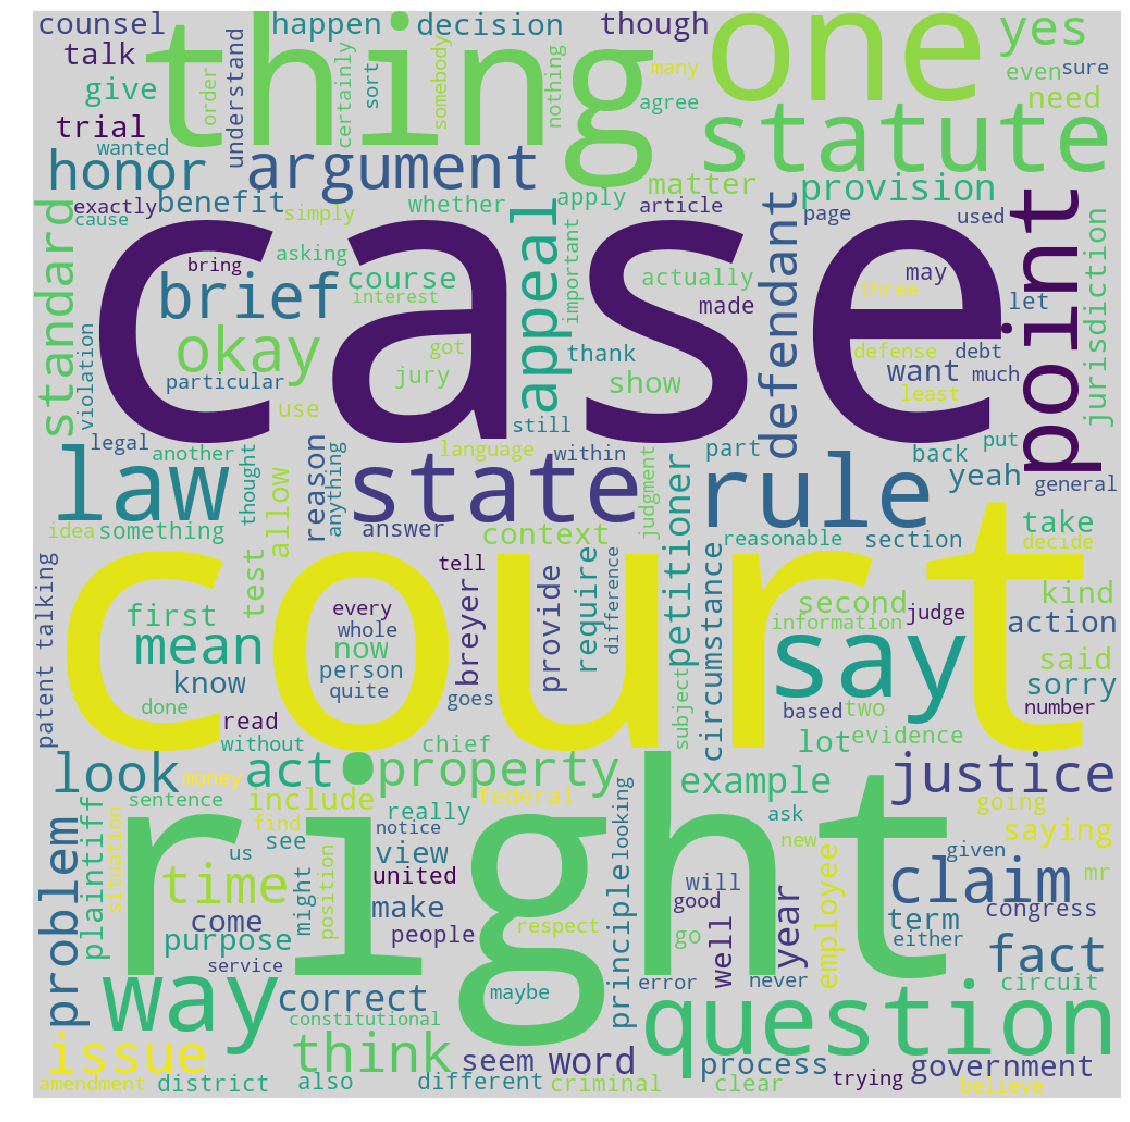

In [73]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#join the words into a single string separated by a space
word_string = ' '.join(rslt['Word'])

#give it some specifications...ignore the boring words with STOPWORDS, etc.
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='lightgrey',
                          width=1000,
                          height=1000
                         ).generate(word_string)

plt.figure(figsize=(20,20) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Going forward, I think this would lend itself well to further text analysis, of the kind I had originally been interested in. How do the most frequent words vary by case subject matter? By which Justice is speaking? Do some Justices use certain words more frequently than others? Are there words that appear more often in cases that where the decision of the lower court is affirmed? 

The transcripts also contain information on the time of day - are certain words used more in the morning or afternoon? It would be interesting (if somewhat nebulous) to try and define the tone of the cases, and see if that varies by time of day, or by month, or by case subject matter.